# TP Règles d'associations et motifs fréquents (correction)

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

from time import time

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth

## Exercice 3. Apriori vs. FP-Growth

Le but de cet exercice est de comparer expérimentalement les implémentations des algorithmes
Apriori et FP-Growth de MLxtend sur deux jeux de données "benchmarks" : mushroom et retail.

1. Pour chacun des deux jeux de données, pour différentes valeurs de minsup, mesurez le temps
d’exécution de chaque algorithme. Relevez également le nombre de motifs fréquents découverts.
Mémorisez les résultats afin de les visualiser sous forme texte ou sous forme graphique (en utili-
sant, par exemple, Matplotlib).

2. Quel algorithme vous semble le plus performant sur mushroom ? Sur retail ? Y a-t-il une
raison à cela selon vous ?

Remarques : vous allez devoir utiliser la format "sparse" (i.e., éparse) de MLxtend. Cette représenta-
tion permet d’économiser la mémoire lorsque les données contiennent beaucoup d’items. Pour mesurer
le temps d’exécution pour pouvez utiliser time, par exemple.

### 0. Préambule

In [90]:
#chargement a partir d'un fichier texte
def charger(datasetname):
    dataset = []
    file = open(datasetname, "r")
    line = file.readline()
    while line:
        line = line.replace(' \n','')
        dataset.append(line.split(' '))
        line = file.readline()
    file.close()
    return dataset


In [91]:
#calcul des motifs avec apriori et fp-growth
def calcul(lesminsupapriori, lestempsapriori, lesminsupfpgrowth, lestempsfpgrowth, nbitemsets):
    print("APRIORI")
    for minsup in lesminsupapriori:
        # APRIORI
        start1 = time()
        frequent_itemsets = apriori(df, min_support=minsup, use_colnames=True, verbose=0)
        end1 = time()
        tempsapriori = end1 - start1
        nbresapriori = len(frequent_itemsets)
        lestempsapriori.append(tempsapriori)
        print(minsup, tempsapriori, nbresapriori)
    print("FP-GROWTH")
    for minsup in lesminsupfpgrowth:
        # FP-Growth
        start2 = time()
        frequent_itemsets2 = fpgrowth(df, min_support=minsup, use_colnames=True, verbose=0)
        end2 = time()
        tempsfpgrowth = end2 - start2
        nbresfpgrowth = len(frequent_itemsets2)
        lestempsfpgrowth.append(tempsfpgrowth)
        nbitemsets.append(nbresfpgrowth)
        print(minsup, tempsfpgrowth, nbresfpgrowth)
    print("terminé")

In [92]:
#graphique des temps d'execution
def graph_temps(datasetname, lesminsupapriori, lestempsapriori, lesminsupfpgrowth, lestempsfpgrowth):
    plt.plot(lesminsupapriori, lestempsapriori, label='Apriori')
    plt.plot(lesminsupfpgrowth, lestempsfpgrowth, label='FP-Growth')
    plt.xlabel('minsup')
    plt.ylabel('execution time (s)')
    plt.gca().invert_xaxis()
    plt.legend()
    plt.title('Comparatif' + ' (' + datasetname + ')')
    plt.show()

In [93]:
#graphique du nombre de motifs frequents generes
def graph_nbre(datasetname, lesminsup, nbitemsets):
    plt.plot(lesminsup, nbitemsets)
    plt.xlabel('minsup')
    plt.ylabel('Nbre motifs')
    plt.gca().invert_xaxis()
    plt.title('Nombre de motifs frequents' + ' (' + datasetname + ')')
    plt.show()

### 1. Comparatif avec "mushroom"

In [94]:
datasetname = 'mushroom.dat'

In [95]:
dataset = charger(datasetname)

In [96]:
#donnees eparses (sparse dataset)
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset, sparse=True)
df = pd.DataFrame.sparse.from_spmatrix(te_ary, columns=te.columns_)
print(df.shape)

(8124, 119)


In [97]:
lesminsupapriori = [0.5, 0.4, 0.35, 0.3, 0.25, 0.24, 0.23, 0.22, 0.21]
lesminsupfpgrowth = [0.5, 0.4, 0.35, 0.3, 0.25, 0.23, 0.21, 0.2, 0.15, 0.1, 0.05]
lestempsapriori = []
lestempsfpgrowth = []
nbitemsets = []

calcul(lesminsupapriori, lestempsapriori, lesminsupfpgrowth, lestempsfpgrowth, nbitemsets)

APRIORI
0.5 0.03676199913024902 153
0.4 0.17280960083007812 565
0.35 0.3622870445251465 1189
0.3 1.191340446472168 2735
0.25 2.6984875202178955 5545
0.24 3.6098408699035645 7555
0.23 5.946513891220093 9595
0.22 8.454469442367554 14271
0.21 27.60841178894043 52465
FP-GROWTH
0.5 0.06402111053466797 153
0.4 0.08409667015075684 565
0.35 0.10006213188171387 1189
0.3 0.10409712791442871 2735
0.25 0.14424943923950195 5545
0.23 0.1721360683441162 9595
0.21 0.3765289783477783 52465
0.2 0.38451266288757324 53583
0.15 1.2376132011413574 98575
0.1 4.317311525344849 574431
0.05 27.81774878501892 3755511
terminé


In [98]:
print(lestempsapriori)
print(lestempsfpgrowth)
print(nbitemsets)

[0.03676199913024902, 0.17280960083007812, 0.3622870445251465, 1.191340446472168, 2.6984875202178955, 3.6098408699035645, 5.946513891220093, 8.454469442367554, 27.60841178894043]
[0.06402111053466797, 0.08409667015075684, 0.10006213188171387, 0.10409712791442871, 0.14424943923950195, 0.1721360683441162, 0.3765289783477783, 0.38451266288757324, 1.2376132011413574, 4.317311525344849, 27.81774878501892]
[153, 565, 1189, 2735, 5545, 9595, 52465, 53583, 98575, 574431, 3755511]


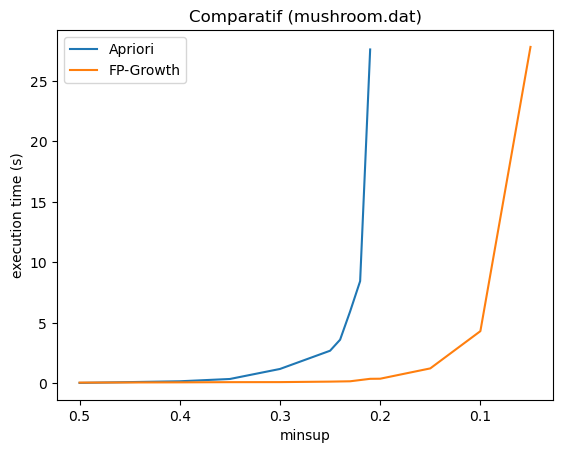

In [99]:
#temps d'execution
graph_temps(datasetname, lesminsupapriori, lestempsapriori, lesminsupfpgrowth, lestempsfpgrowth)

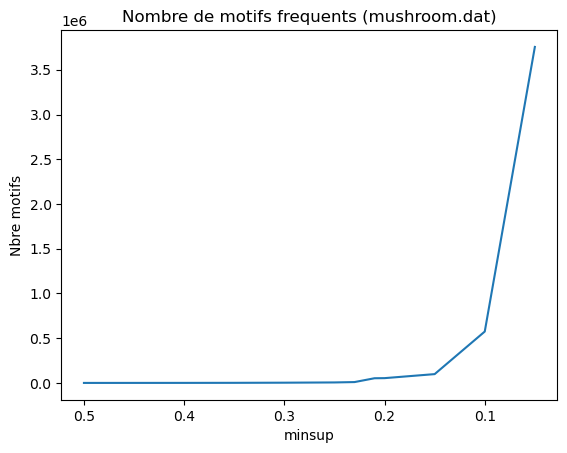

In [100]:
#nombre de motifs frequents
graph_nbre(datasetname, lesminsupfpgrowth, nbitemsets)

### 2. Comparatif avec "retail"

In [101]:
datasetname = 'retail.dat'
dataset = charger(datasetname)

In [102]:
#donnees eparses (sparse dataset)
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset, sparse=True)
df = pd.DataFrame.sparse.from_spmatrix(te_ary, columns=te.columns_)
print(df.shape)

(88162, 16470)


In [115]:
lesminsupapriori = [0.03, 0.02, 0.01, 0.008, 0.005, 0.004]
lesminsupfpgrowth = [0.03, 0.02, 0.01, 0.008, 0.005, 0.003, 0.001, 0.0005, 0.0001, 0.00005]
lestempsapriori = []
lestempsfpgrowth = []
nbitemsets = []

calcul(lesminsupapriori, lestempsapriori, lesminsupfpgrowth, lestempsfpgrowth, nbitemsets)

APRIORI
0.03 0.2982337474822998 32
0.02 0.37656068801879883 55
0.01 1.458130121231079 159
0.008 2.9175968170166016 243
0.005 14.580523490905762 580
0.004 29.7379367351532 831
FP-GROWTH
0.03 0.5809519290924072 32
0.02 0.5653154850006104 55
0.01 0.7058851718902588 159
0.008 0.7377181053161621 243
0.005 1.0359060764312744 580
0.003 2.495023488998413 1393
0.001 3.939666509628296 7589
0.0005 5.68110466003418 19242
0.0001 10.734728336334229 240852
5e-05 25.408729076385498 1506775
terminé


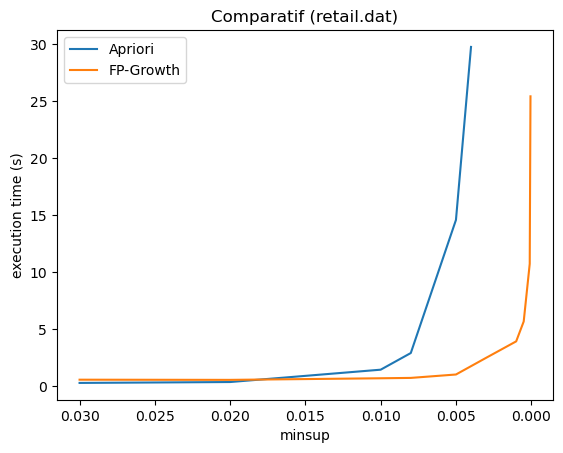

In [116]:
#temps d'execution
graph_temps(datasetname, lesminsupapriori, lestempsapriori, lesminsupfpgrowth, lestempsfpgrowth)

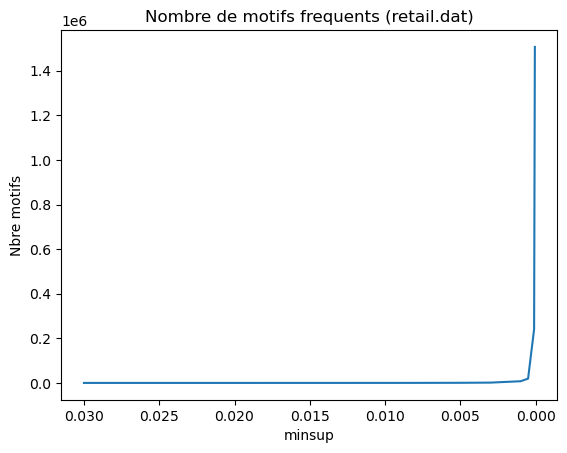

In [117]:
#nombre de motifs frequents
graph_nbre(datasetname, lesminsupfpgrowth, nbitemsets)

### 3. Bilan

On remarque qu'en dessous d'une certaine valeur de *minsup*, il y a une explosion combinatoire. Le nombre de motifs devient très élevé.

Cela se traduit bien entendu par une augmentation du temps d'exécution. Pour Apriori, cette augmentation est très importante et rapide. Pour FP-Growth, elle apparaît mais pour des valeurs de *minsup* plus petits. 

Notons que sur les données Retail, FP-Growth garde de très bonnes performances. La raison vient du fait que ces données sont très éparses (contrairement à Mushroom qui est plus dense) et que FP-Growth utilise des FP-trees.

FP-Growth est plus efficace en général qu'Apriori grâce à sa représentation compactée des transactions chargée en mémoire et à sa stratégie.
